## Stock Prediction using Machine Learning and Python | Machine Learning Training | Edureka  

https://www.youtube.com/watch?v=lncoLfue_Y4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
plt.style.use('bmh')

### 1) Raw Data and EDA

In [2]:
dataset = pd.read_csv('data/Google_Stock_Price_Train.csv', index_col='Date', parse_dates=True)

In [3]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


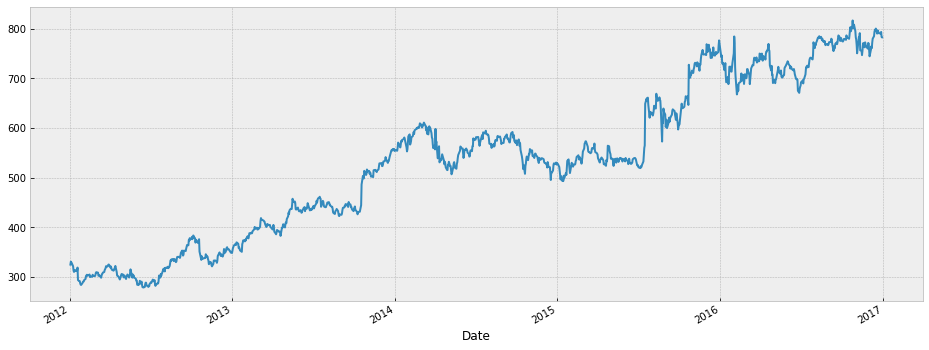

In [6]:
dataset['Open'].plot(figsize=(16, 6));

In [7]:
# Convert column 'a' of DataFrame
dataset['Close'] = dataset['Close'].str.replace(',', '').astype(float)
dataset['Volume'] = dataset['Volume'].str.replace(',', '').astype(float)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [9]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


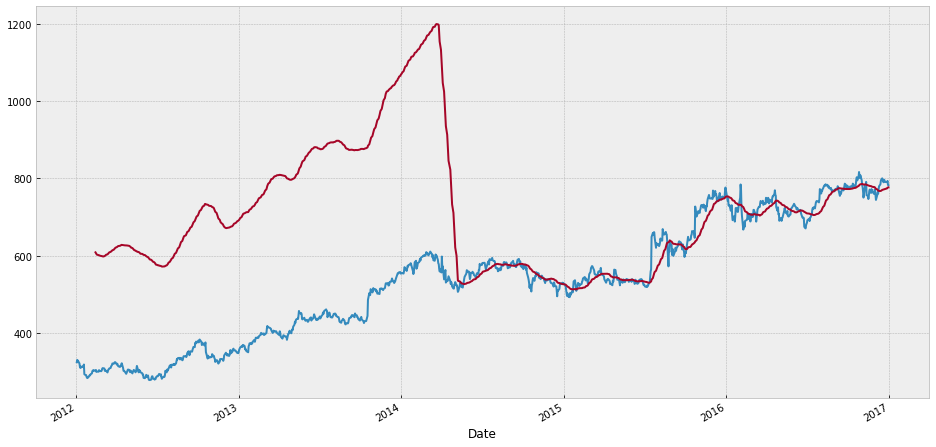

In [10]:
dataset['Open'].plot(figsize=(16, 8))
dataset.rolling(window=30).mean()['Close'].plot();

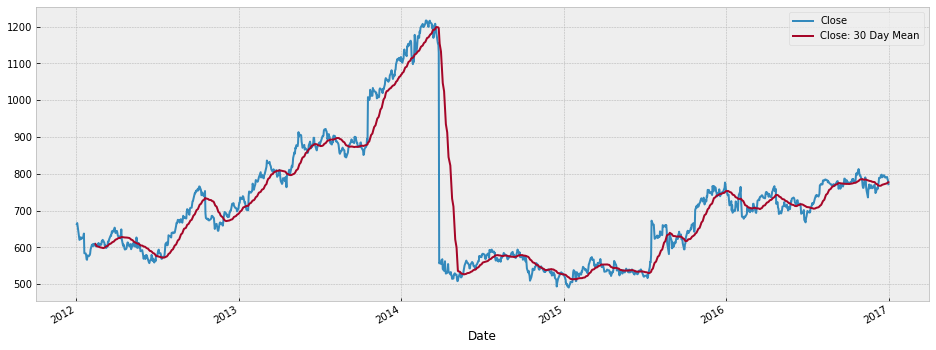

In [11]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close', 'Close: 30 Day Mean']].plot(figsize=(16, 6));

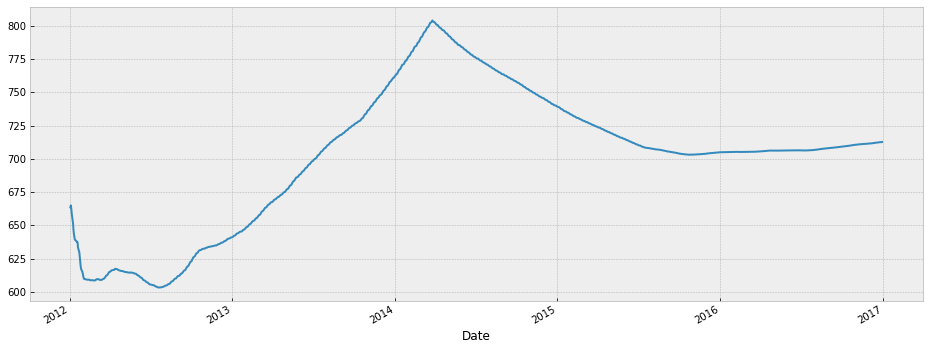

In [12]:
# Optional specify a minimum numer of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16, 6));

### 2) Data Preprocessing

In [13]:
training_set = dataset['Open']
training_set = pd.DataFrame(training_set)

In [14]:
training_set.shape[0]

1258

In [15]:
# Data cleaning
dataset.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Close: 30 Day Mean     True
dtype: bool

In [16]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
training_set

,Open
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04
...,...
2016-12-23,790.90
2016-12-27,790.68
2016-12-28,793.70


In [18]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, training_set.shape[0]):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
a = training_set_scaled[60 - 60:60, 0].reshape(60, 1)

In [20]:
b = training_set_scaled[60 - 60:60, :]

In [21]:
a == b

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [22]:
training_set_scaled[61 - 60:61, 0]

array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
       0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
       0.07474514, 0.02797827, 0.02379269, 0.02409033, 0.0159238 ,
       0.01078949, 0.00967334, 0.01642607, 0.02100231, 0.02280676,
       0.02273235, 0.02810849, 0.03212665, 0.0433812 , 0.04475779,
       0.04790163, 0.0440695 , 0.04648783, 0.04745517, 0.04873875,
       0.03936305, 0.04137213, 0.04034898, 0.04784582, 0.04325099,
       0.04356723, 0.04286033, 0.04602277, 0.05398467, 0.05738894,
       0.05714711, 0.05569611, 0.04421832, 0.04514845, 0.04605997,
       0.04412531, 0.03675869, 0.04486941, 0.05065481, 0.05214302,
       0.05612397, 0.05818885, 0.06540665, 0.06882953, 0.07243843,
       0.07993526, 0.07846566, 0.08034452, 0.08497656, 0.08627874])

In [23]:
training_set_scaled[62 - 60:62, 0]

array([0.09433366, 0.09156187, 0.07984225, 0.0643277 , 0.0585423 ,
       0.06568569, 0.06109085, 0.06639259, 0.0614257 , 0.07474514,
       0.02797827, 0.02379269, 0.02409033, 0.0159238 , 0.01078949,
       0.00967334, 0.01642607, 0.02100231, 0.02280676, 0.02273235,
       0.02810849, 0.03212665, 0.0433812 , 0.04475779, 0.04790163,
       0.0440695 , 0.04648783, 0.04745517, 0.04873875, 0.03936305,
       0.04137213, 0.04034898, 0.04784582, 0.04325099, 0.04356723,
       0.04286033, 0.04602277, 0.05398467, 0.05738894, 0.05714711,
       0.05569611, 0.04421832, 0.04514845, 0.04605997, 0.04412531,
       0.03675869, 0.04486941, 0.05065481, 0.05214302, 0.05612397,
       0.05818885, 0.06540665, 0.06882953, 0.07243843, 0.07993526,
       0.07846566, 0.08034452, 0.08497656, 0.08627874, 0.08471612])

In [24]:
for i in range(60, training_set.shape[0]):
    print(i)

60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319


### 3) Feature Extraction

In [25]:
# Building the RNN

# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [26]:
# Initializing the RNN
regressor = Sequential()

### 4) Training Neural Network: Optimizer | Regularization | Dropouts

In [27]:
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

In [28]:
# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the training set
# 32 is a good number to begin experimenting with or use multiples of 32
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 19s 54ms/step - loss: 0.0908
Epoch 2/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0085
Epoch 3/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0064
Epoch 8/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0037
Epoch 12/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0040
Epoch 13/100
38/38 [====

### Visualization

In [29]:
# Making the predictions and visualizing the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('data/Google_Stock_Price_Test.csv', index_col='Date', parse_dates=True)

In [30]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [31]:
real_stock_price

array([[789.63],
       [791.34],
       [794.48],
       [807.9 ],
       [809.97],
       [809.13],
       [808.15],
       [807.39],
       [811.22],
       [807.14],
       [806.21],
       [809.48],
       [806.91],
       [820.87],
       [825.9 ],
       [835.77],
       [838.  ],
       [841.95],
       [815.84],
       [801.25]])

In [32]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [33]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [34]:
# dataset_test['Close'] = dataset_test['Close'].str.replace(',','').astype(float)
dataset_test['Volume'] = dataset_test['Volume'].str.replace(',','').astype(float)

In [35]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     float64
dtypes: float64(5)
memory usage: 960.0 bytes


In [36]:
test_set = dataset_test['Open']
test_set = pd.DataFrame(test_set)

In [37]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [38]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [39]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


In [40]:
predicted_stock_price

,0
0,780.679932
1,777.960266
2,778.237183
3,779.642883
4,782.895142
5,788.609314
6,793.812683
7,795.891968
8,796.219116
9,796.066467


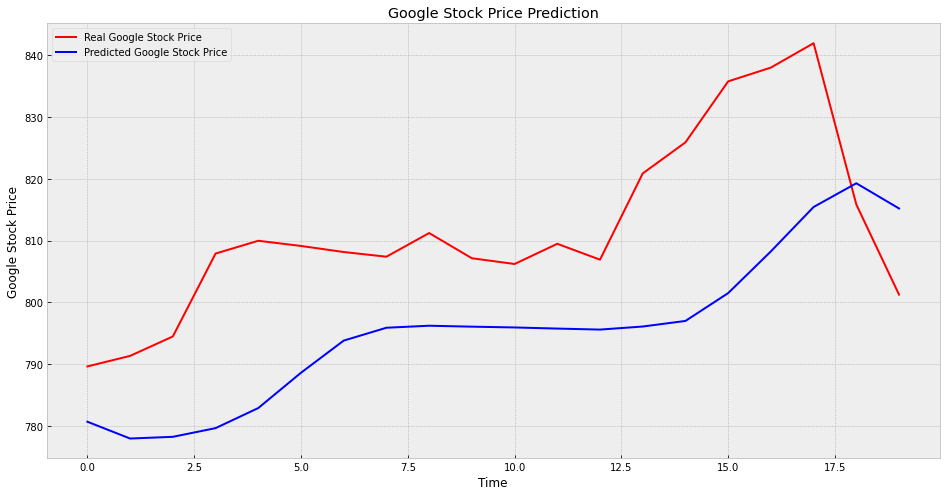

In [41]:
# Visualizing the results
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(real_stock_price, color='red', label='Real Google Stock Price')
ax.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
ax.set_title('Google Stock Price Prediction')
ax.set_xlabel('Time')
ax.set_ylabel('Google Stock Price')
ax.legend();